In [3]:
import pandas as pd 
import csv 
import re
import missingno

In [4]:
stats_research_papers = pd.read_csv('stats_research_papers.csv')
quantbio_research_papers = pd.read_csv('quantbio_research_papers.csv')

In [5]:
print(f'length of stats papers: {len(stats_research_papers)}')
print(f'length of quantitative biology papers: {len(quantbio_research_papers)}')

length of stats papers: 2372
length of quantitative biology papers: 497


In [24]:
stats_research_papers.head()

,title,abstract,authors,body,url
0,Title:Generation interval contraction and epid...,Abstract: The generation interval is the time...,"['Authors:Eben Kenah, Marc Lipsitch, James M. ...",arXiv:0706.2024v3 [q-bio.QM] 21 Feb 2008Gene...,https://arxiv.org/abs/0706.2024
1,Title:Limit distribution theory for maximum li...,Abstract: We find limiting distributions of t...,"['Authors:Fadoua Balabdaoui, Kaspar Rufibach, ...",arXiv:0708.3400v3 [math.ST] 4 May 2009The An...,https://arxiv.org/abs/0708.3400
2,Title:Maximum likelihood estimation of a log-c...,Abstract: We study nonparametric maximum like...,"['Authors:Lutz Duembgen, Kaspar Rufibach']",arXiv:0709.0334v4 [math.ST] 9 Feb 2009Bernou...,https://arxiv.org/abs/0709.0334
3,"Title:Econophysics, Statistical Mechanics Appr...",Abstract: This is a review article for Encycl...,['Authors:Victor M. Yakovenko'],arXiv:0709.3662v4 [q-fin.ST] 3 Aug 2008Econo...,https://arxiv.org/abs/0709.3662
4,Title:A nonlinear Stein based estimator for mu...,Abstract: The use of multicomponent images ha...,"['Authors:Caroline Chaux, Laurent Duval, Amel ...",arXiv:0712.2317v1 [physics.data-an] 14 Dec 2...,https://arxiv.org/abs/0712.2317


In [6]:
# setting fields 
stats_research_papers['field'] = 'statistics'
quantbio_research_papers['field'] = 'quantitative biology'

In [7]:
#concatenating the df's
research_papers = pd.concat([stats_research_papers, quantbio_research_papers], ignore_index=True)


In [8]:
#adding id to research papers
research_papers['id'] = research_papers['url'].str.extract(r'arxiv.org/abs/0*([\d\.]+)')


In [9]:
len(research_papers)

2869

In [10]:
# regex fnctions to find emails and links 

import re 
def find_urls(body):
    try:
        url_pattern = r'https?://[^\s<>"\']+(?:\.[^\s<>"\']+)*'

        urls = re.findall(url_pattern, body)

        return urls
    except:
        return []

def find_emails(body):
    try:
        email_pattern =  r'\b[\w\.-]+@[\w\.-]+\.\w+\b'

        emails = re.findall(email_pattern, body)
        return emails 
    
    except:
        return []

In [11]:
#applying the functions 
research_papers['emails'] = research_papers['body'].apply(find_emails)
research_papers['url_links'] = research_papers['body'].apply(find_urls)

In [12]:
research_papers.head()

,title,abstract,authors,body,url,field,id,emails,url_links
0,Title:Generation interval contraction and epid...,Abstract: The generation interval is the time...,"['Authors:Eben Kenah, Marc Lipsitch, James M. ...",arXiv:0706.2024v3 [q-bio.QM] 21 Feb 2008Gene...,https://arxiv.org/abs/0706.2024,statistics,706.2024,[ekenah@hsph.harvard.edu],[]
1,Title:Limit distribution theory for maximum li...,Abstract: We find limiting distributions of t...,"['Authors:Fadoua Balabdaoui, Kaspar Rufibach, ...",arXiv:0708.3400v3 [math.ST] 4 May 2009The An...,https://arxiv.org/abs/0708.3400,statistics,708.3400,"[fadoua@ceremade.dauphine.frK, kaspar.ruﬁbach@...",[http://arxiv.org/math/0609056]
2,Title:Maximum likelihood estimation of a log-c...,Abstract: We study nonparametric maximum like...,"['Authors:Lutz Duembgen, Kaspar Rufibach']",arXiv:0709.0334v4 [math.ST] 9 Feb 2009Bernou...,https://arxiv.org/abs/0709.0334,statistics,709.0334,"[duembgen@stat.unibe.ch, kaspar.ruﬁbach@ifspm....",[http://anson.ucdavis.edu/˜debashis/techrep/lo...
3,"Title:Econophysics, Statistical Mechanics Appr...",Abstract: This is a review article for Encycl...,['Authors:Victor M. Yakovenko'],arXiv:0709.3662v4 [q-fin.ST] 3 Aug 2008Econo...,https://arxiv.org/abs/0709.3662,statistics,709.3662,[],"[http://refworks.springer.com/complexity/, htt..."
4,Title:A nonlinear Stein based estimator for mu...,Abstract: The use of multicomponent images ha...,"['Authors:Caroline Chaux, Laurent Duval, Amel ...",arXiv:0712.2317v1 [physics.data-an] 14 Dec 2...,https://arxiv.org/abs/0712.2317,statistics,712.2317,"[laurent.duval@ifp.fr, benazza.amel@supcom.rnu...","[http://www.io.csic.es/PagsPers/JPortilla/, ht..."


<Axes: >

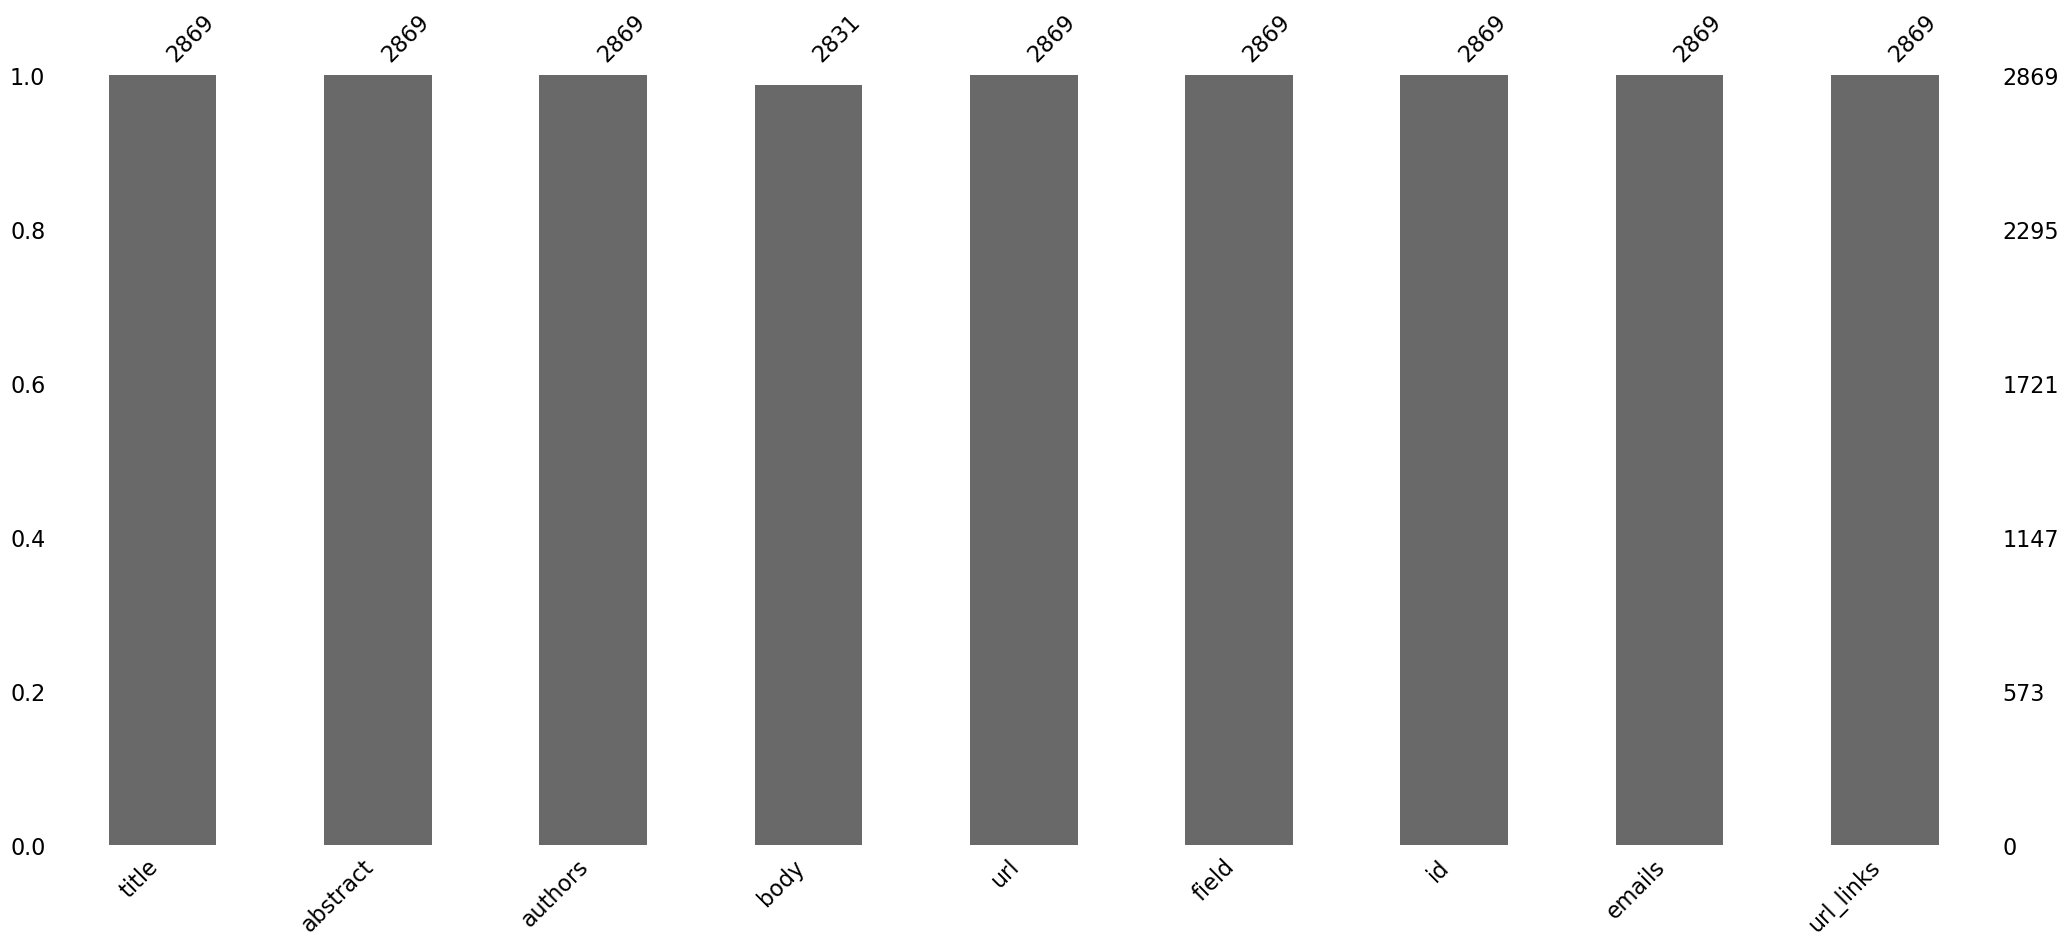

In [33]:
missingno.bar(research_papers)

In [ ]:
# writing the concatenated dataset to a csv file 
research_papers.to_csv('arxiv_dataset.csv',
                       index=False,
                       encoding='utf-8',
                       sep=',',
                       na_rep='NaN')

In [46]:
def get_emails_from_df(df):

    email_list = []

    for index, row in df.iterrows():
        email_list.extend(row['emails'])

    return email_list
         
email_list = get_emails_from_df(research_papers)

In [47]:
email_list

['ekenah@hsph.harvard.edu',
 'fadoua@ceremade.dauphine.frK',
 'kaspar.ruﬁbach@ifspm.uzh.ch',
 'jaw@stat.washington.edu',
 'duembgen@stat.unibe.ch',
 'kaspar.ruﬁbach@ifspm.uzh.ch',
 'laurent.duval@ifp.fr',
 'benazza.amel@supcom.rnu.tn',
 'bradluen@stat.berkeley.edu',
 'stark@stat.berkeley.edu',
 'juditsky@imag.frArkadi',
 'nemirovs@isye.gatech.edu',
 'gill@math.leidenuniv.nl',
 'peter.grunwald@cwi.nl',
 'lorenzo.finesso@isib.cnr.it',
 'spreij@uva.nl',
 'cshalizi@cmu.edu',
 'eek4@u.washington.edu',
 'permissions@oxfordjournals.org.2',
 'o.o.aalen@medisin.uio.no',
 'P.K.Andersen@biostat.ku.dk',
 'borgan@math.uio.no',
 'gill@math.leidenuniv.nl',
 'N.Keiding@biostat.ku.dk',
 'koyama@stat.cmu.edu',
 'lcastell@cs.cmu.edu',
 'cshalizi@stat.cmu.edu',
 'kass@stat.cmu.edu',
 'nkudraszow@mate.unlp',
 'niels.kammerer@wiso.uni-erlangen.de',
 'stummer@mi.uni-erlangen.de',
 'etienne.bernard@ens.fr',
 'werner.krauth@ens.frprove',
 'etienne.bernard@ens.fr',
 'werner.krauth@ens.fr',
 'etienne.bernard@ens

In [48]:
len(email_list)

4455

In [49]:
# email list to a file 
with open('email_list.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for email in email_list:
        writer.writerow([email])